In [1]:
# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # SVM

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)
#par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)
library(ggplot2)
library(data.table)
library(tidyverse)
library(dplyr)

#install.packages()
#resource https://blog.princehonest.com/stat-learning/

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var



Attaching package: 'e1071'


The following object is masked from 'package:mlr':

    impute


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ------------------------------------

# Q3

In [13]:
set.seed(1)
x = cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
x

1,4
1,3
0,4
5,1
6,2
4,0


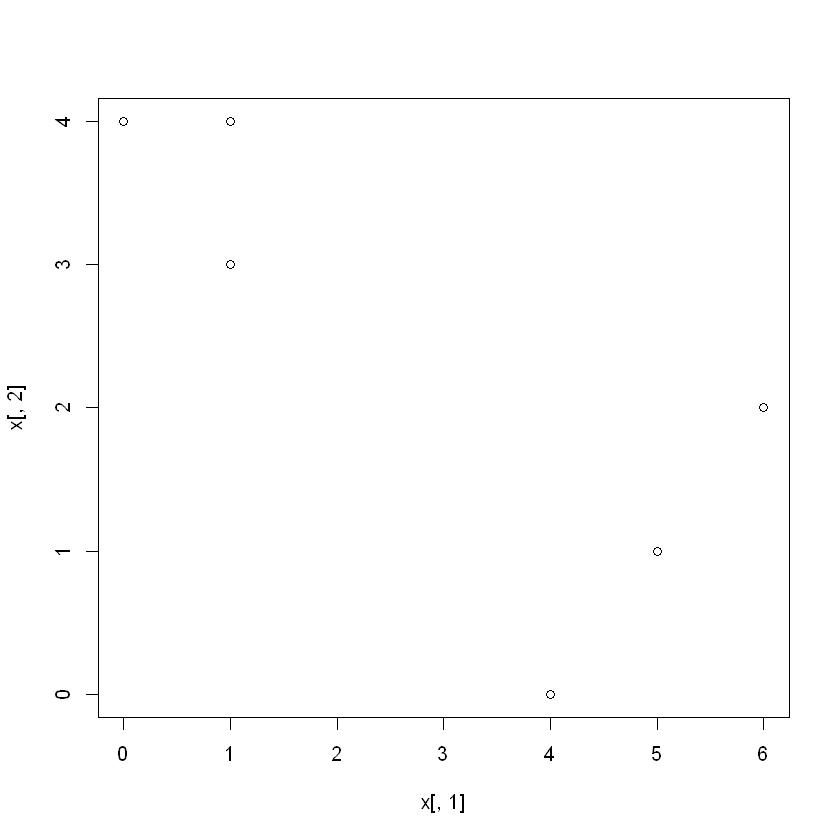

In [14]:
#part a
plot(x[,1], x[,2])

In [15]:
#part B
set.seed(1)
labels = sample(2, nrow(x), replace=T)
labels

[1] 1 2 1 1 2 1

In [16]:
#part C
centroid1 = c(mean(x[labels==1, 1]), mean(x[labels==1, 2]))
centroid2 = c(mean(x[labels==2, 1]), mean(x[labels==2, 2]))
centroid1

[1] 2.50 2.25

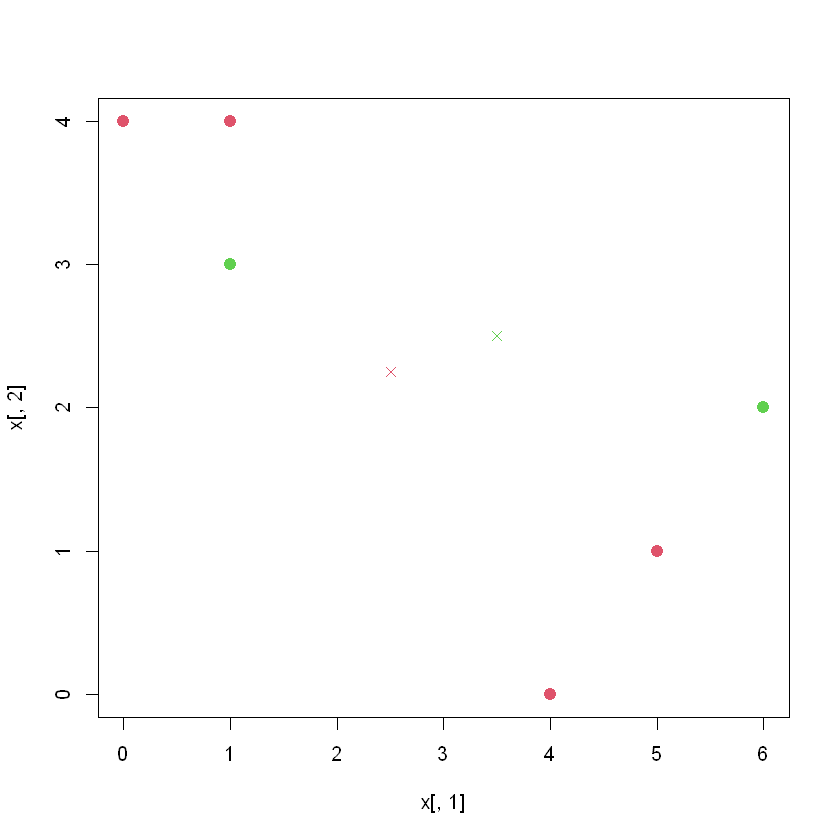

In [17]:
plot(x[,1], x[,2], col=(labels+1), pch=20, cex=2)
points(centroid1[1], centroid1[2], col=2, pch=4)
points(centroid2[1], centroid2[2], col=3, pch=4)

In [18]:
euclid = function(a, b) {
  return(sqrt((a[1] - b[1])^2 + (a[2]-b[2])^2))
}
assign_labels = function(x, centroid1, centroid2) {
  labels = rep(NA, nrow(x))
  for (i in 1:nrow(x)) {
    if (euclid(x[i,], centroid1) < euclid(x[i,], centroid2)) {
      labels[i] = 1
    } else {
      labels[i] = 2
    }
  }
  return(labels)
}
labels = assign_labels(x, centroid1, centroid2)
labels

[1] 1 1 1 2 2 2

In [20]:
# part E
last_labels = rep(-1, 6)
while (!all(last_labels == labels)) {
  last_labels = labels
  centroid1 = c(mean(x[labels==1, 1]), mean(x[labels==1, 2]))
  centroid2 = c(mean(x[labels==2, 1]), mean(x[labels==2, 2]))
  print(centroid1)
  print(centroid2)
  labels = assign_labels(x, centroid1, centroid2)
}
labels


[1] 0.6666667 3.6666667
[1] 5 1


[1] 1 1 1 2 2 2

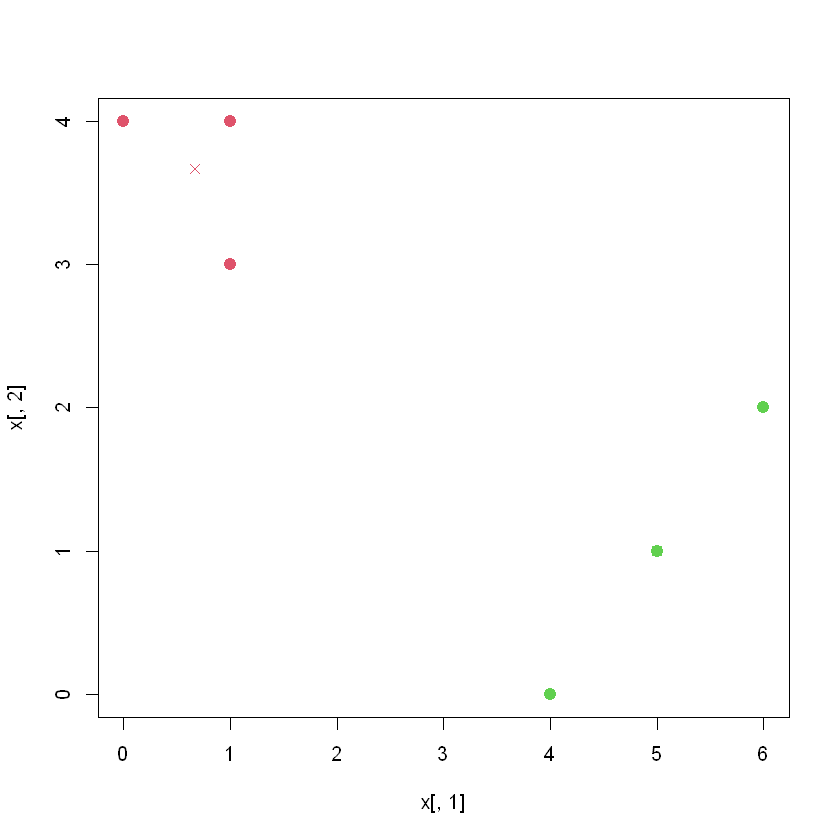

In [21]:
#Part F
plot(x[,1], x[,2], col=(labels+1), pch=20, cex=2)
points(centroid1[1], centroid1[2], col=2, pch=4)
points(centroid2[1], centroid2[2], col=3, pch=4)


# Q4

#part a
Information is not a straw to the conclusion. The maximum inter-cluster dissimilarity can be equal to or equal to the minimum inter-cluster dissimilarity. If the inequalities were equal, they would be combined at the same height. If they were not equal, the single-link dendrograms would be combined at a lower height.

#part b
They fuse at the same height since lincage wont affect leaf-to-leaf fusion

# Q8

# Q9

# Q10